In [1]:
#libraries
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [7]:
import torch
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [10]:
dataset = datasets.ImageFolder('C:/Users/aarad/OneDrive/Desktop/Aachen/datasets/', transform=transform)

In [12]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

<AxesSubplot:>

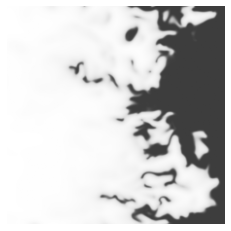

In [24]:
images, labels = next(iter(dataloader))
# helper.imshow(images[0], normalize=False)
imshow(images[11], normalize=False)

In [31]:
def wasserstein_loss(y_true, y_pred):
    return torch.mean(y_true * y_pred)
def mse_loss(y_true, y_pred):
    return torch.mean(torch.square(y_true - y_pred))

In [32]:
wasserstein_loss(images[0],images[1])

tensor(0.7051)

In [33]:
mse_loss(images[0], images[1])

tensor(0.0084)

### 2nd Method

In [40]:
channels = 3
img_size = 512
img_shape = (channels, img_size, img_size)
lr = 0.05 #Learning Rate

In [37]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
        )

    def forward(self, img):
        img_flat = img.view(img.shape[0], -1)
        validity = self.model(img_flat)
        return validity


<span style="color:red"> **Haven't been tested yet because of GPU memory issues.**</span>

In [39]:
cuda = True if torch.cuda.is_available() else False
discriminator = Discriminator()
if cuda:
    discriminator.cuda()

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 2.00 GiB total capacity; 1.50 GiB already allocated; 0 bytes free; 1.50 GiB reserved in total by PyTorch)

In [ ]:
optimizer_D = torch.optim.RMSprop(discriminator.parameters(), lr=opt.lr)
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor


In [ ]:
loss_D = -torch.mean(discriminator(real_imgs)) + torch.mean(discriminator(fake_imgs))
loss_D.backward()
optimizer_D.step()